In [2]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer

reviews_train = load_files("aclImdb/train")
text_train, y_trian = reviews_train.data, reviews_train.target

In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [4]:
reviews_test = load_files("aclImdb/test")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [5]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [6]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=10, random_state=0)
document_topics = lda.fit_transform(X)

In [7]:
lda.components_.shape

(10, 10000)

In [13]:
import numpy as np

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

In [14]:
import mglearn 

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        didn          girl          war           show          
dvd           nothing       kids          world         series        
game          actors        old           us            episode       
horror        book          guy           american      tv            
video         script        now           history       shows         
director      actually      going         against       episodes      
genre         thought       school        during        season        
quite         worst         want          years         television    
may           minutes       again         our           new           
work          read          years         german        now           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
funn

In [15]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=10, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [18]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
cagney        house         kevin         opera         role          town          action        
keaton        jackson       paris         soap          cast          small         fight         
role          haunted       kane          bugs          moore         horror        holmes        
star          dead          ford          duvall        performance   city          sequences     
james         mansion       citizen       sutherland    actor         sheriff       guys          
parker        bear          jay           phantom       funny         hammer        hero          
day           ghost         vegas         bunny         played        lake          cop           
hollywood     twin          shakespeare   midnight      khan          local         fighting      
buster    

In [20]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

TypeError: 'numpy.int64' object is not iterable

NameError: name 'words' is not defined

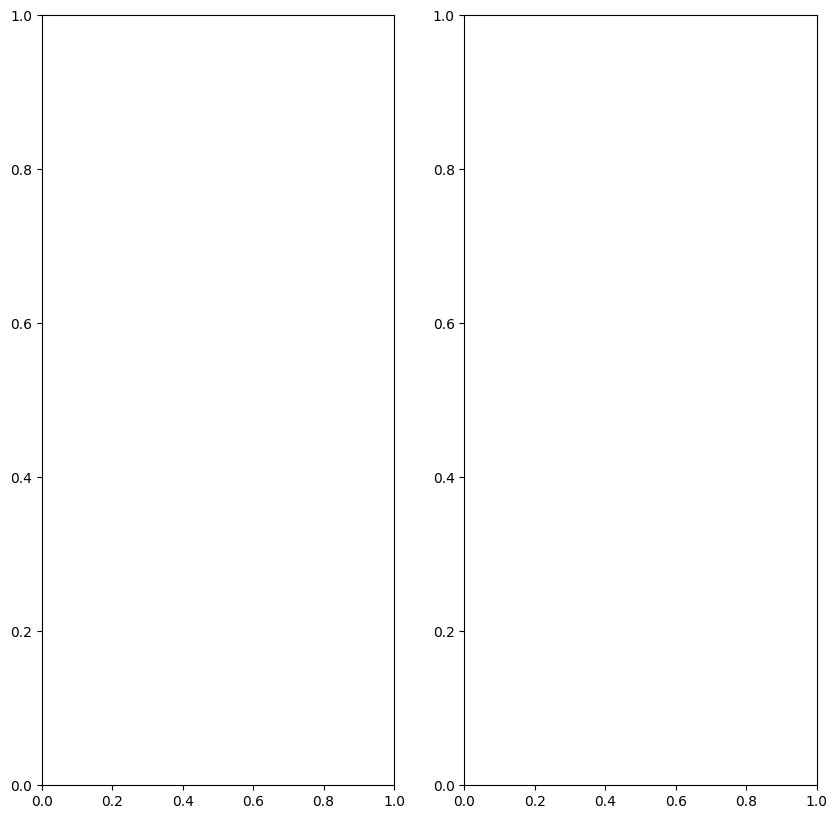

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, word in enumerate(feature_names[sorting[:, :2]])]
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()